### Week 3
#### Object Localization
1. **Object localization** involves using CNN for both the prediction of the class and the corresponding bounding box. 
2. A typical target label is such that $y=[P_c~b_x~b_y~b_h~b_w~c_1~c_2~c_3]^T$ where $P_c = 1$ indicates that the object of interest is in the image and $P_c = 0$ indicates that the image is a background image. $c_i$ are the class labels where $c_i = 1$ indicates that the object $i$ has been found in the image. When an object of interest is detected, the label would look like $y=[1~b_x~b_y~b_h~b_w~0~1~0]^T$. On the other hand, if we have a background image, the label would look like $y=[0~?~?~?~?~?~?~?]^T$
3. To complete the network, we define the loss function as $L(\hat y, y) = (\hat y_1 - y_1)^2 + ... + (\hat y_8 - y_8)^2 $ if $y_1 = 1$ else $L(\hat y, y) = (\hat y_1 - y_1)^2$ if $y_0 = 1$

#### Landmark Detection
1. Landmark/keypoint detection's labels can be denoted as $y = [P_c~l_{1x}~l_{1y}~...~...~l_{64x}~l_{64y}]$

#### Object Detection & Convolution Implementation of Sliding Windows
1. One way of doing object detection is to train a CNN that identify a small square within a bigger image and we slide the CNN over different regions of the image. You can vary the size of window for each 'scan' iteration. This algorithm is called **sliding windows detection**. The downside of this algorithm is the computational cost due to sequential sliding operations.
2. We can convert the whole operation as a CNN implementation. In the following example, supposed that we have at input image of `14x14x3`, we can use CNN to generate an output of `1x1x4` that classifies the object. This is shown in the top row. When we have a larger image, we can reuse the resulting network and run `4` times, leading to a `2x2x4` output where each of the `2x2` grid represent different 'locations' within the `16x16x3` image. 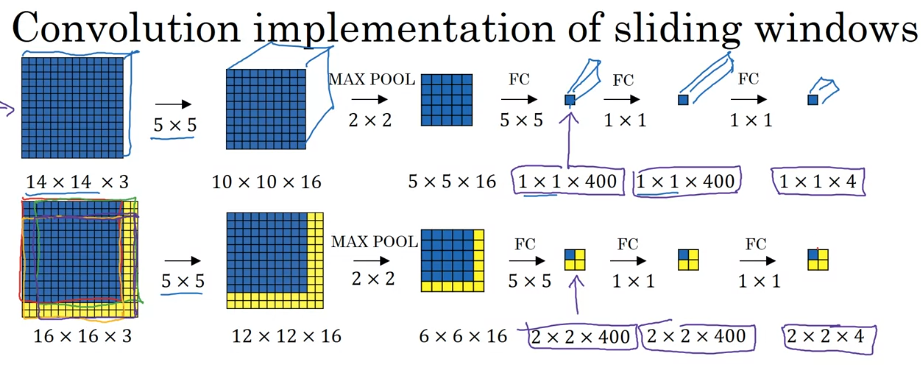
3. In short, CNN can process the entire image in one signel forward pass. One problem still remain though. The predicted location of the object will not be accurate.

#### Bounding box predictions, IOU and Non-max suppression
1. Suppose we want to divide the original image into a prediction grid of `3x3`, i.e. the output will be `3x3x8` where the target label $y=[P_c~b_x~b_y~b_h~b_w~c_1~c_2~c_3]^T$ is a vector of `8` values (the last dimension). 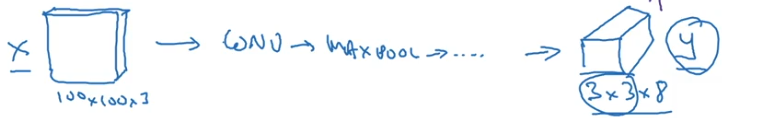
2. IOU and Non-max suppression are used as post processors for the predicted bounding boxes. In the non-max suppression algorithm, we first discard bounding boxes with low $p_c$. Subsequently, for each of the classes, we scan for the bounding box with the highest $p_c$ and check the IOU against all other boxes. Any box that has a high enough IOU with the target box is then removed. We go through this until all boxes are checked.

#### Anchor boxes
1. The problem with using grid cells is that you can only detect one object per grid cell. Although you can limit the occurrence by using very fine grid cells, there are still cases where you have overlapping objects of similar sizes that are assigned to the same grid cell and hence getting ignored. The solution is to use anchor boxes.
2. With anchor boxes, each of the grid will now contain more than just 1 box. The number and shape of anchor boxes are usually designed using k-means clustering of the objects of interests from the dataset. Previously, without anchor boxes, using a grid of `3x3` to detect `3` classes of objects, the network output is `3x3x8` where `8` is the size of the label. Each object is assigned to the grid cell that contains the object's midpoint.
3. Using `n` anchor boxes, the output is now `3x3xnx8`. Each object in the training dataset is assigned to a grid cell that contains the object's midpoint **AND** the anchor box with the highest IOU.

### Semantic Segmentation with U-Net
1. Given an input image, the goal of the object detection is to draw a bounding box around the object detected in the image. Semantic segmentation, however, classifies each pixel so that they can be separated out and analyzed in downstream processes.
2. This done typically with a U-Net architecture. 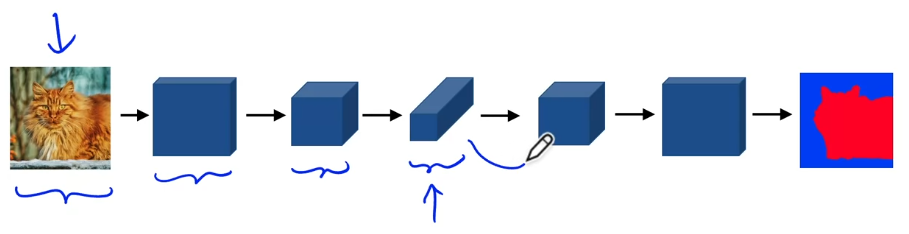